### Ingest Data

Input CSV data is generated from the [./ticket_to_csv.py](./ticket_to_csv.py) script.

We are using all machine-generated and hand-annoatated tags to generate a t-distributed Stochastic Neighbor Embedding (t-SNE) model to discover the relationship between variety of tags. For more background information, please refer to [github.com/mlopatka/CANOSP2020/issues/59](https://github.com/mlopatka/CANOSP2020/issues/59)

#### How?

- Download `tickets.json` and `tickets.csv` from `SUMO_data_dump_raw` folder at our share GDrive folder



**Remember that jupyter requires filesystem paths specified RELATIVE to the path from which jupyter was launched**

- What subset of the available corpus is used?
- What are the criteria defined for measuring performance?
- Is filtering on date, version, tags employed? No
- Size of the data being used in this demo. 

In [1]:
"""code executing the data ingestions steps"""
from tsne_utils import get_tags

import chars2vec as c2v

# fetch all machine-generated and hand-annoatated tags
tags = get_tags("./data/tickets_v2.csv")

# load pre-trained char2vec model
c2v_model = c2v.load_model("train_fr_150/")

Using TensorFlow backend.
Model and weights loaded successfully train_fr_150/


### Preprocessing and Feature Engineering steps

- Remove tags that occurs less than a specific <threshold> time. See `Config` class.
- Remove tags using a series of filter function.

In [3]:
fn_rm_firefox_version_tag = lambda x: re.match(r"^firefox-(.*)", x)
fn_rm_firefox_tag = lambda x: re.match(r"^firefox", x)
fn_rm_windows_version_tag = lambda x: re.match(r"^windows-(.*)", x)
fn_rm_windows_tag = lambda x: re.match(r"^windows", x)

class Config(object):
    """
    Customize config to run the T-SNE model
    """
    def __init__(self):
        self.threshold = 10 # Minimal number of occurences to be included in the model
        self.filtered_tags_fn = [fn_rm_firefox_version_tag, fn_rm_firefox_tag, fn_rm_windows_tag, fn_rm_windows_version_tag] # Method apply on each tag to filter stuffs we don't want
        self.tsne_n_iter = 2500 # See https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
        self.tsne_perplexity = 40 # See https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

config_01 = Config()

# of tags: 1288663, # of filter tags: 727158
# of unique tags: 4401, # of unique filtered tags 411
Reference dict: 'Label': 'Tag'
{0: 'desktop', 1: 'other', 2: 'fix-problems', 3: 'websites', 4: 'general', 5: 'customize', 6: 'privacy-and-security_1', 7: 'data', 8: 'download-and-install_1', 9: 'mac-os', 10: 'features', 11: 'linux', 12: 'mac-os-x-106', 13: 'bookmarks', 14: 'beta', 15: 'addon', 16: 'tabs', 17: 'crash', 18: 'needsinfo', 19: 'escalate', 20: 'sync', 21: 'learning', 22: 'tips', 23: 'mac-os-x-105', 24: 'mac-os-x-1010', 25: 'mac-os-x-108', 26: 'rolandff62experiment', 27: 'helpdesk', 28: 'cookies', 29: 'mac-os-x-107'}


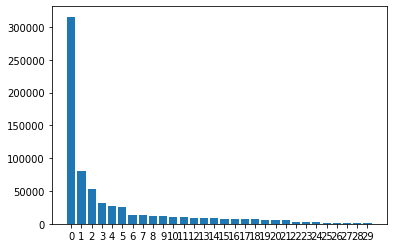

Word embedding shape: (411, 150)
T-SNE embedding shape: (411, 2)


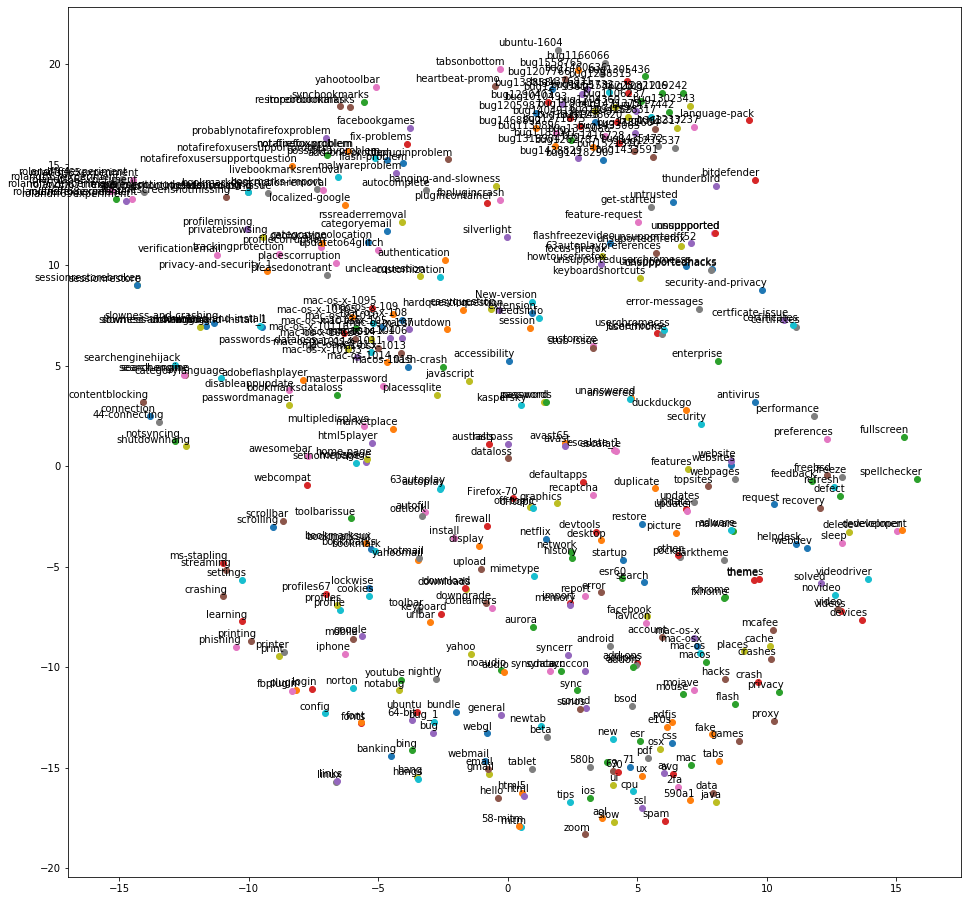

In [6]:
"""code performing data cleaning and data preprocessing tasks"""
import csv
import itertools
import matplotlib.pyplot as plt
import re

from sklearn.manifold import TSNE
from collections import Counter
from tsne_utils import build_tsne_embeddings, plot_tsne, cleanup_tags


unique_filtered_tags = cleanup_tags(tags, threshold=config_01.threshold, exclude_tags_fn=config_01.filtered_tags_fn or None)
# preplexity: we should experiment with value between 5 and 50 to see different results
# n_components: the input word embeding is a (num_words, 150) 2-D matrix
# n_iter: number of iterations for optimization, >= 250
# random_state: seed for random number generator
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_embeddings = build_tsne_embeddings(unique_filtered_tags, c2v_model=c2v_model, tsne_model=tsne_model)
plot_tsne(tsne_embeddings, unique_filtered_tags)

### Tag lexicon definition description

Define the set of tags that are defined for the task

In [34]:
"""code that performes the tag selection and/or any data manipulation that prefaces the classification/annotation task"""

Word embedding shape: (359, 150)


### Classifier/Annontator Training step

Describe the model and the model training step

- Include a description the feature space used
- Include a description of the selected classification or annotation model
- Describe the training process and expected runtime for training

In [8]:
"""code that executes model training step"""

'code that executes model training step'

### Classifier/Annotator Testing step

Describe the testing of the trained model's performace against a defined test set.

- Include the raw performance
- Include the source of ground truth for the evaluation
- Include figures for FP/FN/ROC type metrics describing the model performance.

In [9]:
"""code that executes the model testing step"""

'code that executes the model testing step'

### Interpretation
Sumamrize the model performance and findings related to specific misclassified items also a breif description of the findings as they correpsonde to generalizability.